# First things First!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


# 1. Analyzing by Time, Day and Month

## Which hour has the highest frequency of crimes?

In [2]:
crimes["TIME OCC"] = crimes["TIME OCC"].astype(str)  # Ensure the column is of string type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

peak_crime_hour = crimes["HOUR OCC"].value_counts().idxmax()
peak_crime_hour_count = crimes["HOUR OCC"].value_counts().max()
print(f"The hour with the highest frequency of crimes is {peak_crime_hour}:00 with {peak_crime_hour_count} crimes.")

The hour with the highest frequency of crimes is 12:00 with 13663 crimes.


<AxesSubplot: xlabel='HOUR OCC', ylabel='count'>

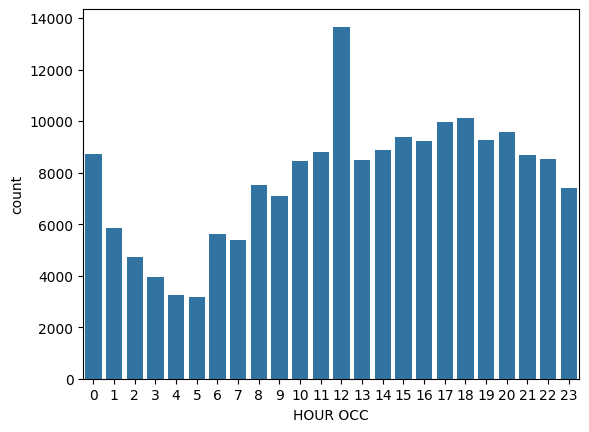

In [3]:
sns.countplot(data=crimes, x="HOUR OCC", order=range(24))

## Which weekday the highest frequency of crimes?

In [4]:
crimes['Month'] = crimes['DATE OCC'].dt.month
crimes['Day of Week'] = crimes['DATE OCC'].dt.day_name()

In [5]:
# Find the weekday with the highest frequency of crimes
weekday_with_highest_crime = weekday_crime_counts.idxmax()
highest_crime_count = weekday_crime_counts.max()

print(f"The weekday with the highest frequency of crimes is: {weekday_with_highest_crime} with {highest_crime_count} crimes.")

NameError: name 'weekday_crime_counts' is not defined

/tmp/ipykernel_130/607135315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_crime_counts.index, y=weekday_crime_counts.values, palette="viridis")


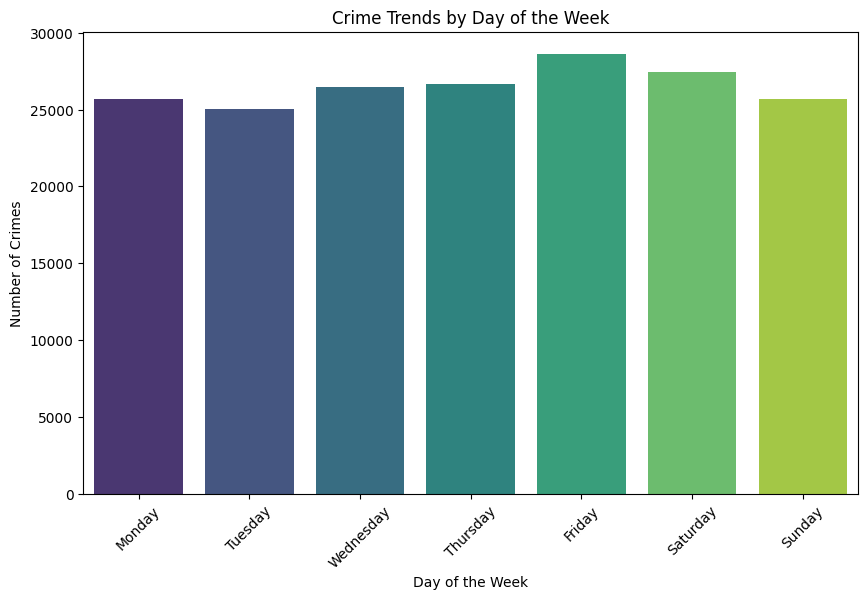

In [20]:
weekday_crime_counts = crimes['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_crime_counts.index, y=weekday_crime_counts.values, palette="viridis")
plt.title('Crime Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

## Which month the highest frequency of crimes?

In [27]:
# Identify the month with the highest frequency of crimes
highest_crime_month = monthly_crime_counts.idxmax()
highest_crime_count = monthly_crime_counts.max()

print(f"The month with the highest frequency of crimes is: {highest_crime_month} with {highest_crime_count} crimes.")

The month with the highest frequency of crimes is: 6 with 26997 crimes.


/tmp/ipykernel_130/2063972469.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_crime_counts.index, y=monthly_crime_counts.values, marker="o", palette="coolwarm")


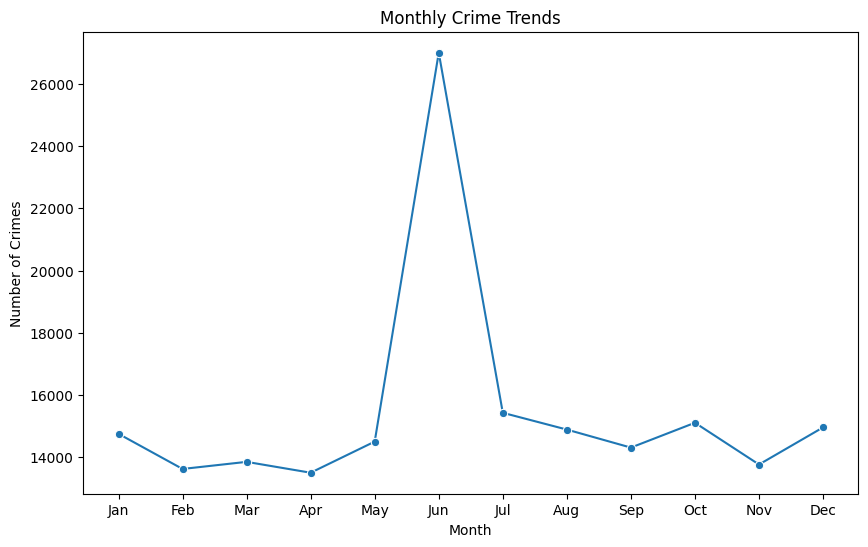

In [28]:
monthly_crime_counts = crimes['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_crime_counts.index, y=monthly_crime_counts.values, marker="o", palette="coolwarm")
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# 2. Analyzing by Age Group

## Identify the number of crimes committed against victims of different age groups. 

In [29]:
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)

victim_ages = crimes['Age Group'].value_counts(sort=False)

# Display the resulting Series
print(victim_ages)

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


/tmp/ipykernel_130/3484491515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victim_ages.index, y=victim_ages.values, palette="viridis")


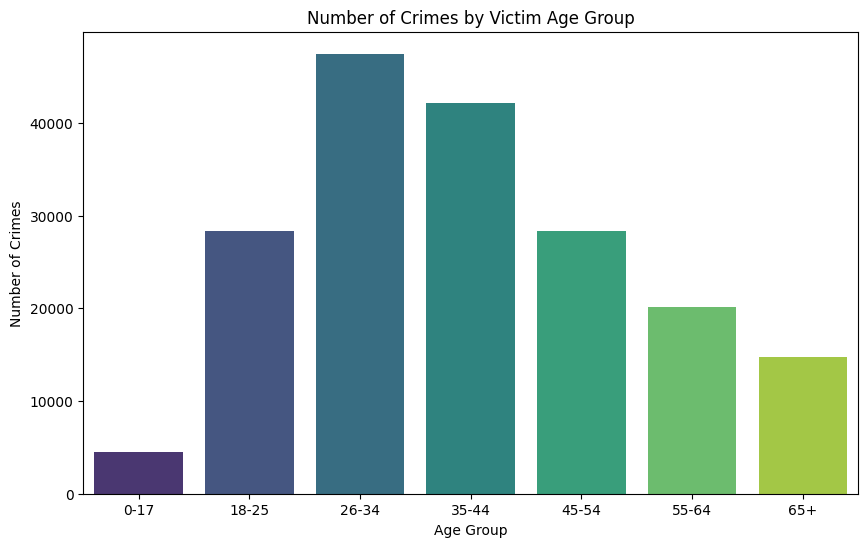

In [30]:
# Plot the distribution of crimes by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=victim_ages.index, y=victim_ages.values, palette="viridis")
plt.title('Number of Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.show()

## Identify which crime types are most prevalent in different age groups

In [32]:
age_crime_analysis = crimes.groupby(['Age Group', 'Crm Cd Desc']).size().reset_index(name='Crime Count')

age_crime_analysis_sorted = age_crime_analysis.sort_values(['Age Group', 'Crime Count'], ascending=[True, False])
age_crime_analysis_sorted

/tmp/ipykernel_130/485575765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_crime_analysis = crimes.groupby(['Age Group', 'Crm Cd Desc']).size().reset_index(name='Crime Count')


,Age Group,Crm Cd Desc,Crime Count
4,0-17,BATTERY - SIMPLE ASSAULT,1271
2,0-17,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",674
28,0-17,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,473
71,0-17,ROBBERY,394
27,0-17,CRIMINAL THREATS - NO WEAPON DISPLAYED,253
...,...,...,...
696,65+,SHOPLIFTING - ATTEMPT,0
702,65+,TELEPHONE PROPERTY - DAMAGE,0
710,65+,"THEFT, COIN MACHINE - PETTY ($950 & UNDER)",0
715,65+,TILL TAP - GRAND THEFT ($950.01 & OVER),0


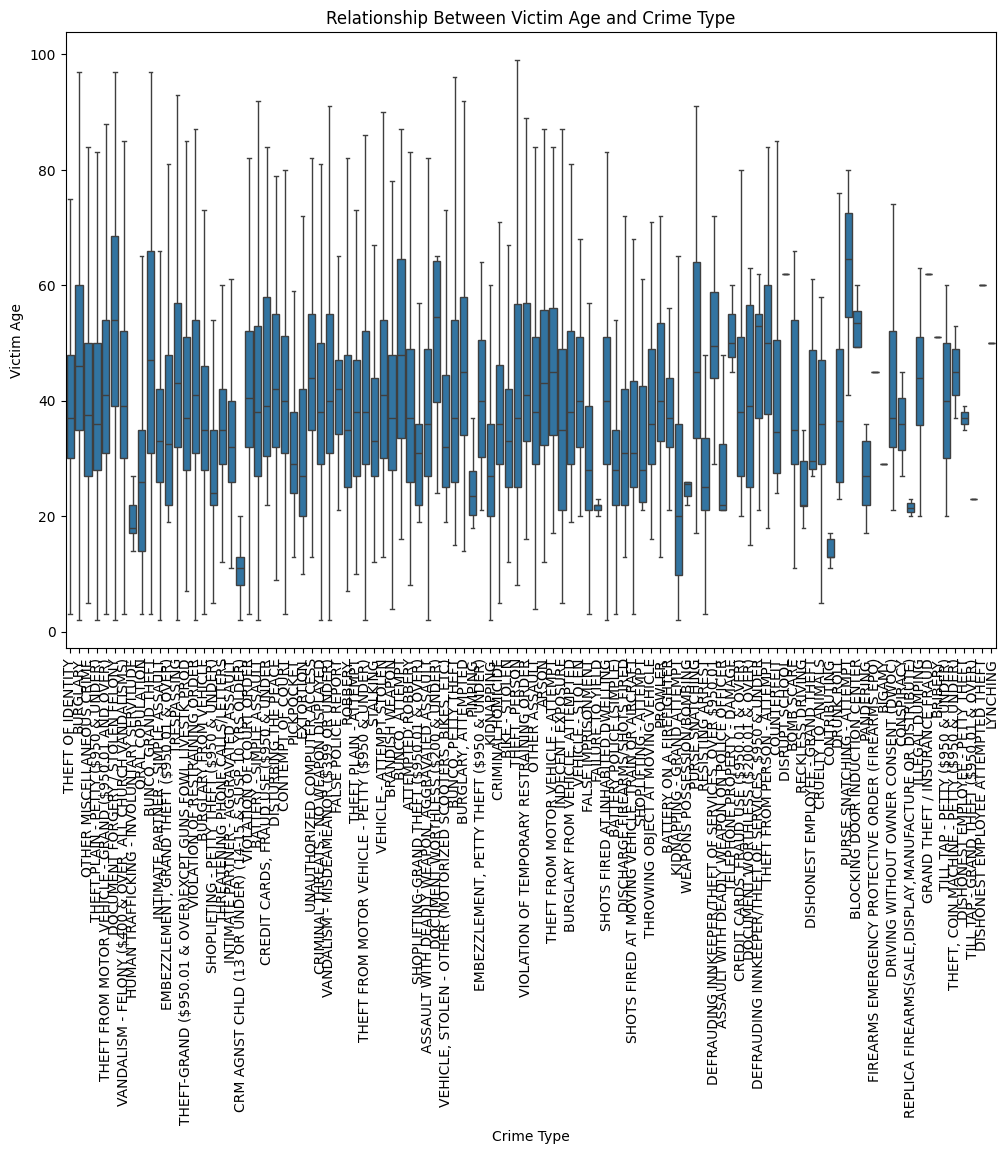

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=crimes, x='Crm Cd Desc', y='Vict Age', showfliers=False)
plt.xticks(rotation=90)
plt.title('Relationship Between Victim Age and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Victim Age')
plt.show()

In [34]:
age_crime_pivot = age_crime_analysis.pivot(index='Age Group', columns='Crm Cd Desc', values='Crime Count').fillna(0)

correlation_matrix = age_crime_pivot.corr()

correlation_matrix

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BIGAMY,BIKE - STOLEN,BLOCKING DOOR INDUCTION CENTER,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Crm Cd Desc,,,,,,,,,,,,,,,,,,,,,
ARSON,1.000000,0.072132,0.752784,0.757220,0.864050,0.718405,0.264594,0.281263,0.575212,0.631719,...,0.884605,0.924320,0.961286,0.933482,0.915568,0.529130,0.894342,0.943856,0.860018,-0.071379
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,0.072132,1.000000,0.495709,0.616304,0.335617,0.235143,0.878728,0.085662,0.703292,-0.259008,...,-0.181357,0.280410,0.190982,0.230563,0.181330,0.738778,0.008194,0.011376,-0.110926,0.829231
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0.752784,0.495709,1.000000,0.971732,0.971828,0.828062,0.754002,0.580831,0.947202,0.164348,...,0.553258,0.935672,0.871009,0.894421,0.786863,0.888133,0.815165,0.806665,0.721569,0.353275
ATTEMPTED ROBBERY,0.757220,0.616304,0.971732,1.000000,0.926620,0.827716,0.771931,0.400111,0.956756,0.215339,...,0.568555,0.912633,0.847152,0.875160,0.825325,0.886667,0.760199,0.748824,0.660031,0.394106
BATTERY - SIMPLE ASSAULT,0.864050,0.335617,0.971828,0.926620,1.000000,0.803549,0.632912,0.607335,0.858039,0.301119,...,0.659952,0.980253,0.949751,0.949818,0.830407,0.821161,0.892464,0.913685,0.809788,0.237210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",0.529130,0.738778,0.888133,0.886667,0.821161,0.582784,0.944383,0.625745,0.952833,-0.160031,...,0.193483,0.771110,0.708451,0.735639,0.510007,1.000000,0.577072,0.598744,0.490190,0.736628
VIOLATION OF COURT ORDER,0.894342,0.008194,0.815165,0.760199,0.892464,0.878908,0.302899,0.452933,0.656066,0.449170,...,0.842233,0.939785,0.921938,0.918603,0.886710,0.577072,1.000000,0.973705,0.910816,-0.086354
VIOLATION OF RESTRAINING ORDER,0.943856,0.011376,0.806665,0.748824,0.913685,0.769731,0.321492,0.512746,0.625701,0.482783,...,0.815012,0.951432,0.964610,0.940383,0.854301,0.598744,0.973705,1.000000,0.903527,-0.027941


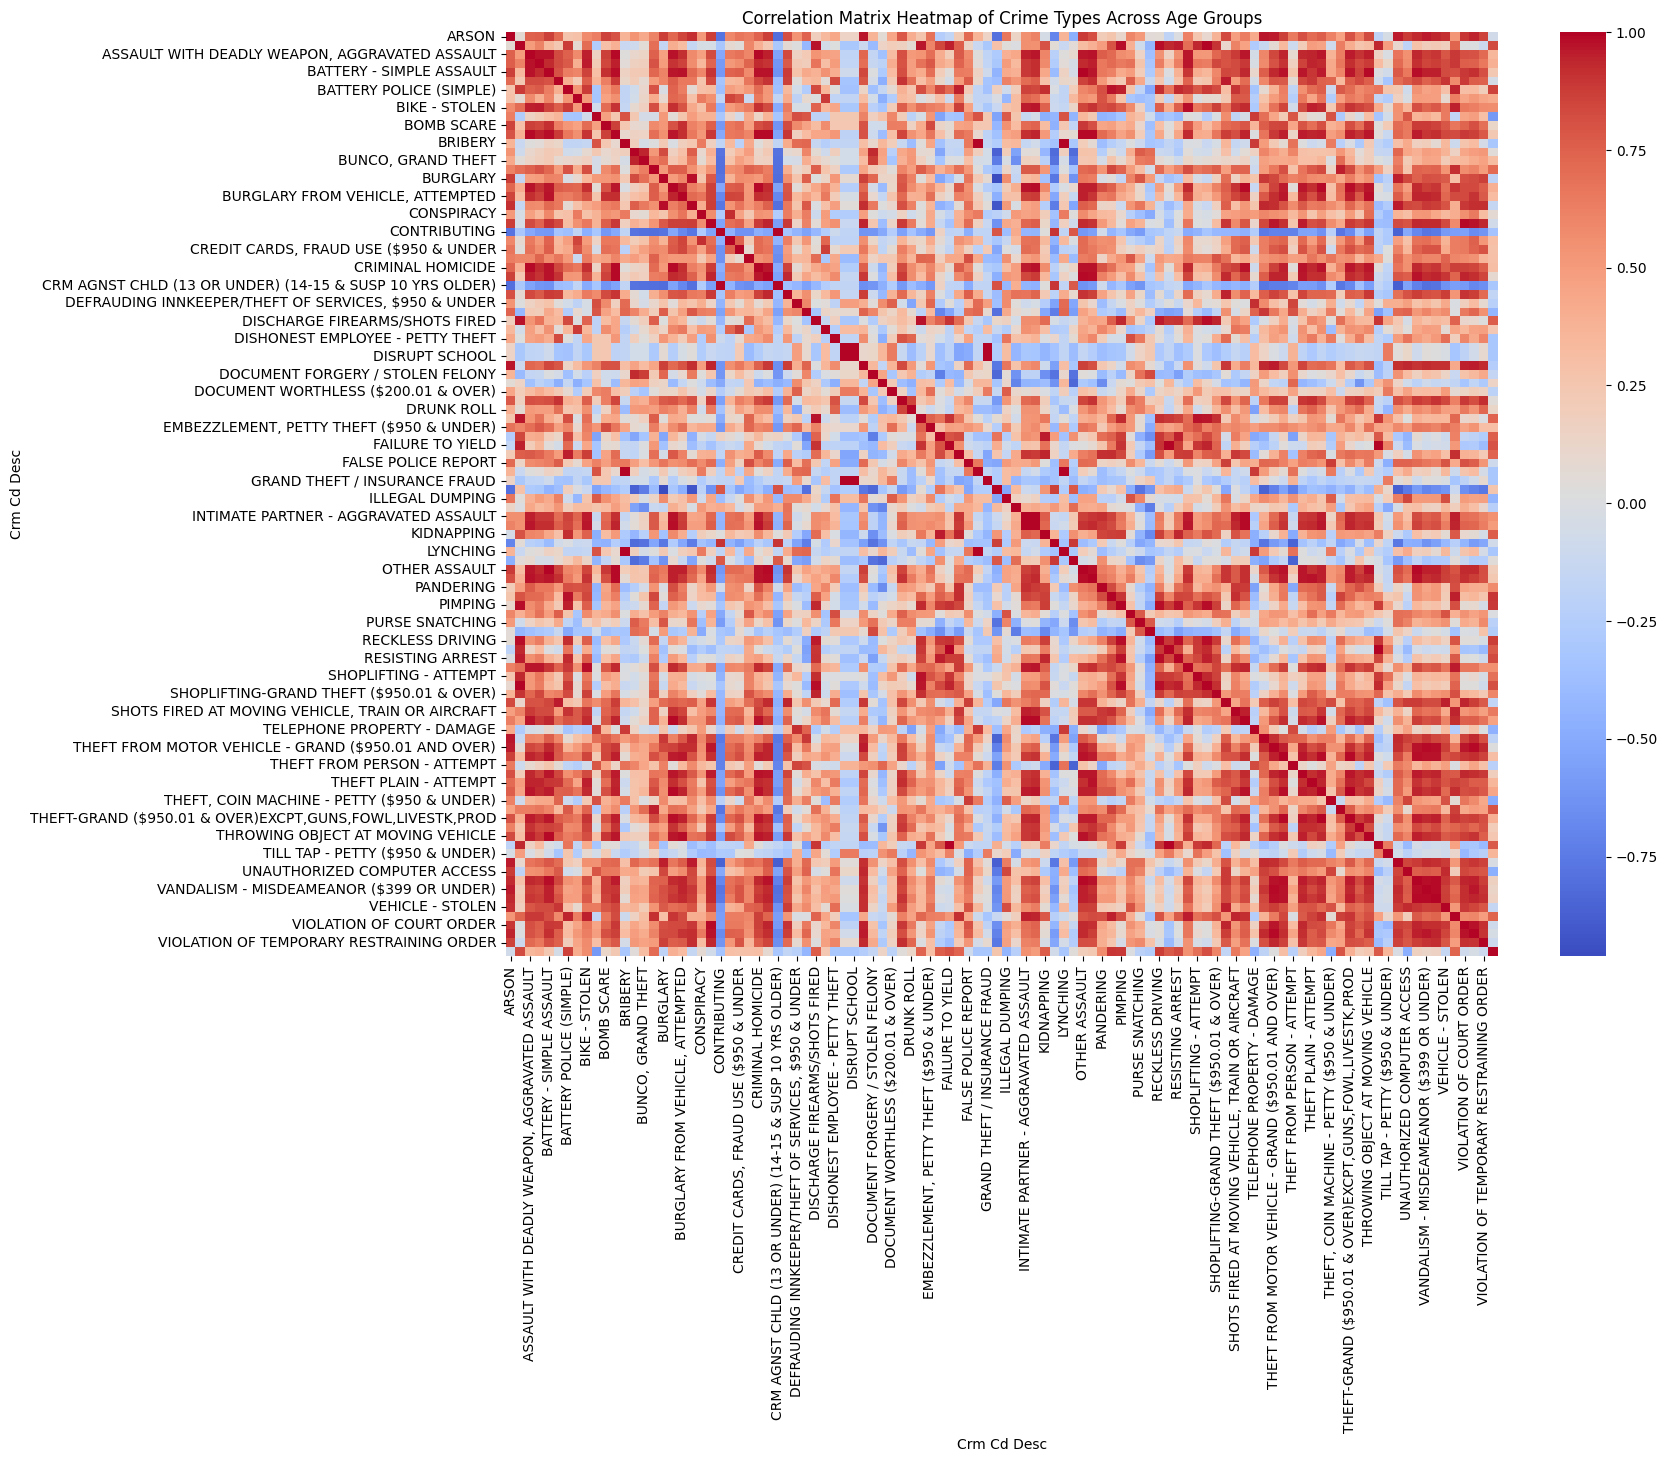

In [35]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix Heatmap of Crime Types Across Age Groups")
plt.show()

## Identify the 5 most common crime types based on victim age

/tmp/ipykernel_130/1371287726.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  common_crime_types_top5 = age_crime_analysis_sorted.groupby('Age Group').apply(lambda x: x.nlargest(5, 'Crime Count')).reset_index(drop=True)


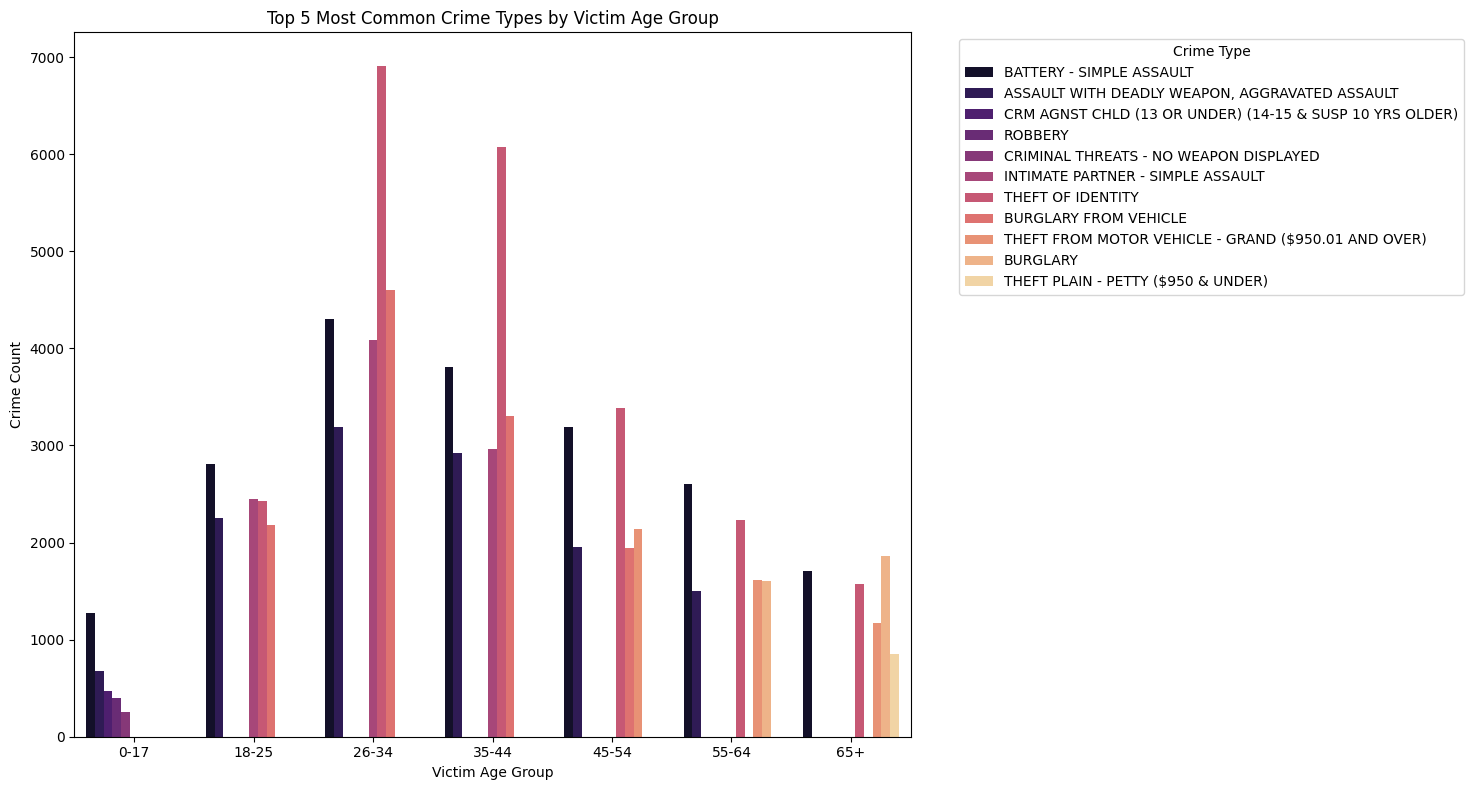

In [36]:
common_crime_types_top5 = age_crime_analysis_sorted.groupby('Age Group').apply(lambda x: x.nlargest(5, 'Crime Count')).reset_index(drop=True)

plt.figure(figsize=(15, 8))
sns.barplot(data=common_crime_types_top5, x='Age Group', y='Crime Count', hue='Crm Cd Desc', dodge=True, palette="magma")
plt.title('Top 5 Most Common Crime Types by Victim Age Group')
plt.xlabel('Victim Age Group')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Analyzing by Geographic Area

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [4]:
crimes["HOUR OCC"] = crimes["HOUR OCC"].astype(int)
# Filter the night crimes
night_crimes = crimes[(crimes["HOUR OCC"] >= 22) | (crimes["HOUR OCC"] < 3)]
area_counts = night_crimes['AREA NAME'].value_counts()

peak_night_crime_location = night_crimes["AREA NAME"].value_counts().idxmax()
peak_night_crime_location_count = area_counts.max()
print(f"The area with the largest frequency of night crimes is {peak_night_crime_location} with {peak_night_crime_location_count} crimes.")

The area with the largest frequency of night crimes is Central with 3011 crimes.


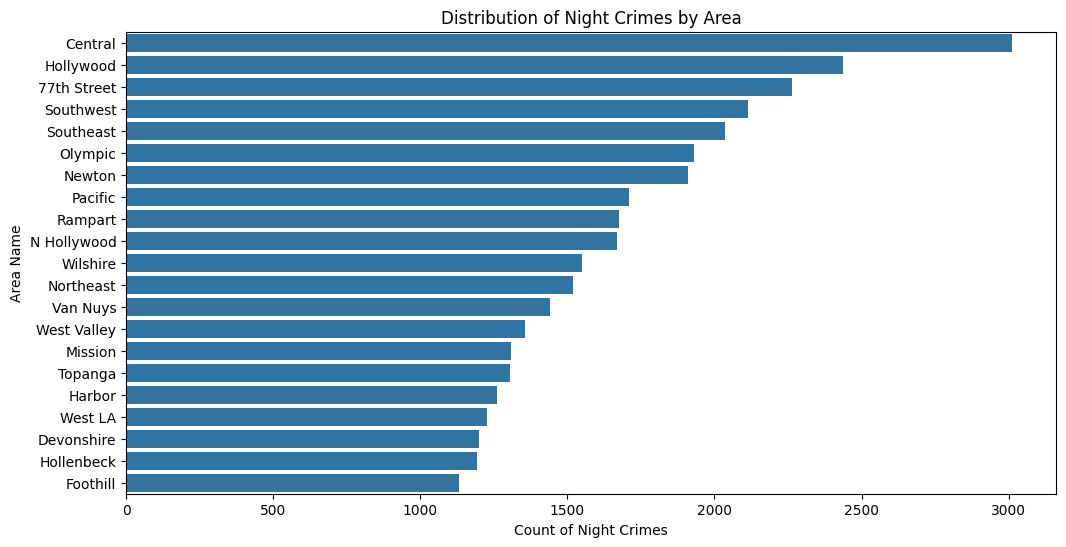

In [5]:
# Plot the distribution of night crimes across areas
plt.figure(figsize=(12, 6))
sns.countplot(data=night_crimes, y="AREA NAME", order=night_crimes["AREA NAME"].value_counts().index)
plt.title('Distribution of Night Crimes by Area')
plt.xlabel('Count of Night Crimes')
plt.ylabel('Area Name')
plt.show()

## Identify which crime types are most prevalent in different geographic areas.

In [31]:
common_crime_types = crimes.groupby("AREA NAME")["Crm Cd Desc"].agg(lambda x: x.value_counts().idxmax())
common_crime_counts = crimes.groupby("AREA NAME")['Crm Cd Desc'].value_counts().groupby('AREA NAME').max()

most_common_crimes = pd.DataFrame({"Most Common Crime": common_crime_types, "Count": common_crime_counts})
most_common_crimes

,Most Common Crime,Count
AREA NAME,,
77th Street,THEFT OF IDENTITY,1977
Central,BURGLARY FROM VEHICLE,2918
Devonshire,THEFT OF IDENTITY,1100
Foothill,THEFT OF IDENTITY,1037
Harbor,THEFT OF IDENTITY,781
Hollenbeck,THEFT OF IDENTITY,887
Hollywood,BATTERY - SIMPLE ASSAULT,1274
Mission,THEFT OF IDENTITY,1171
N Hollywood,THEFT OF IDENTITY,1083


> Generate a heatmap of crime occurrences across different geographic areas in Los Angeles.

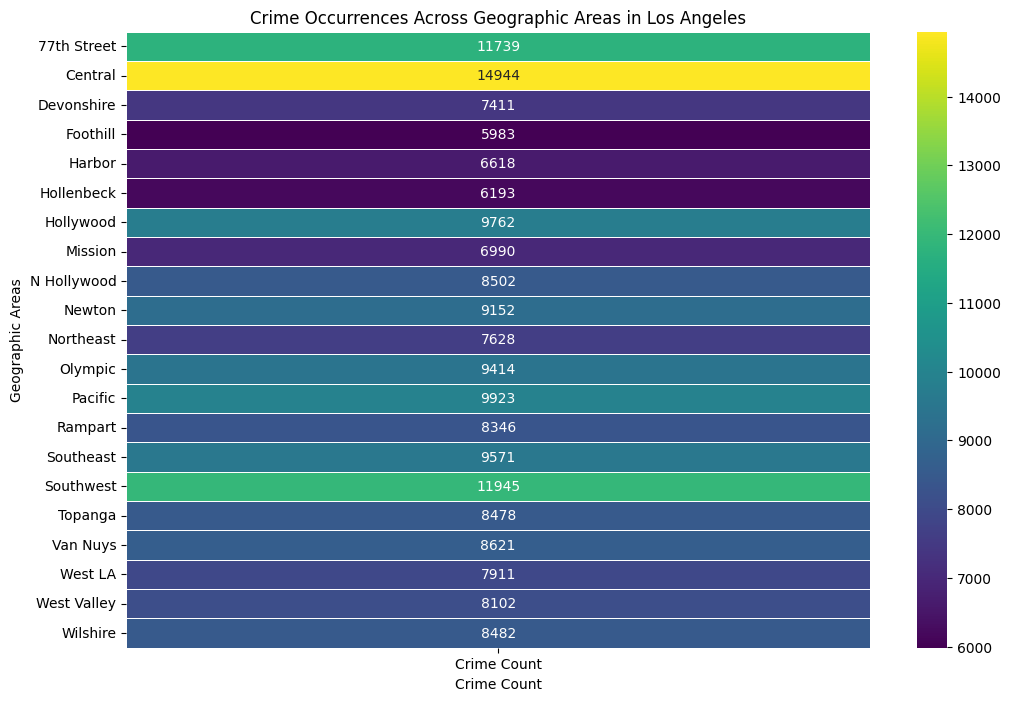

In [42]:
# Aggregate crime counts by geographic areas
geo_crime_counts = crimes['AREA NAME'].value_counts().sort_index()

# Create a DataFrame to visualize counts
geo_crime_matrix = pd.DataFrame({
    'Geographic Area': geo_crime_counts.index,
    'Crime Count': geo_crime_counts.values
}).set_index('Geographic Area')

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(geo_crime_matrix, annot=True, cmap='viridis', fmt='g', linewidths=0.5)
plt.title('Crime Occurrences Across Geographic Areas in Los Angeles')
plt.xlabel('Crime Count')
plt.ylabel('Geographic Areas')
plt.show()

# 4. Analyzing by Demographics

## Investigate the potential impact of victim descent on crime type occurrences

/tmp/ipykernel_130/810082047.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


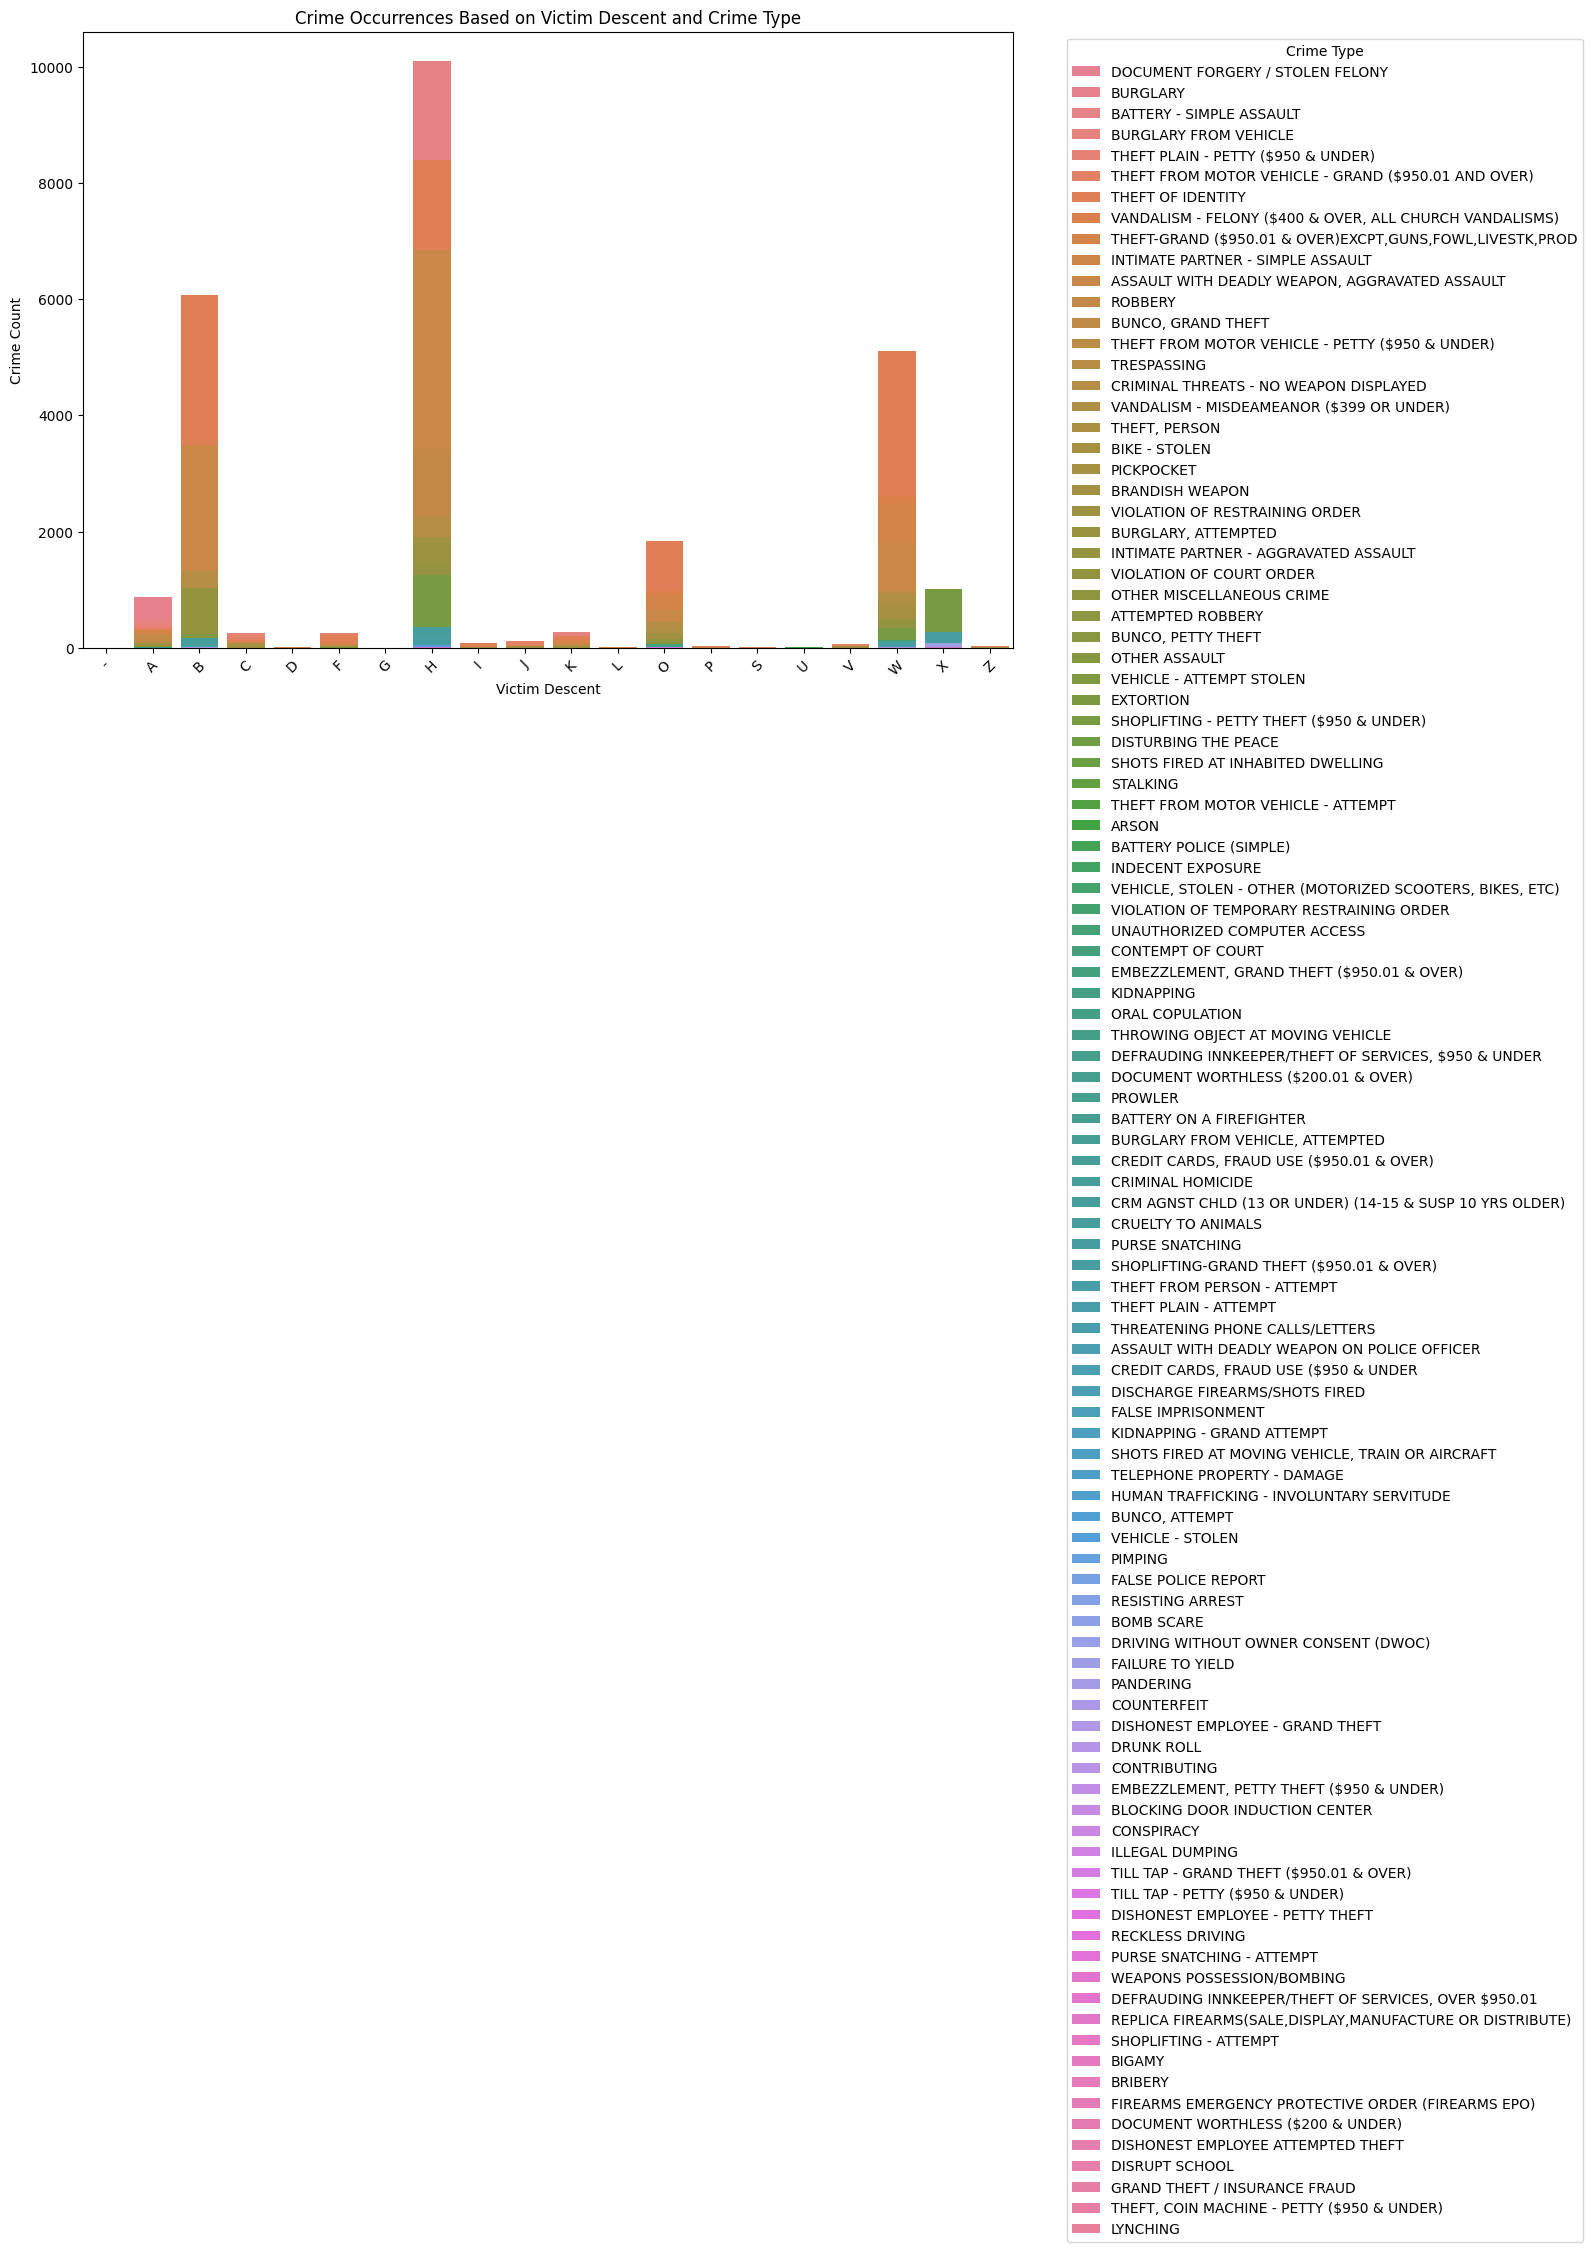

In [43]:
# Aggregate data to tally crime occurrences based on victim descent and crime type
victim_descent_crime_analysis = crimes.groupby(['Vict Descent', 'Crm Cd Desc']).size().reset_index(name='Crime Count')

# Sort to identify the highest frequencies for each descent, if needed
victim_descent_crime_analysis_sorted = victim_descent_crime_analysis.sort_values(by=['Vict Descent', 'Crime Count'], ascending=[True, False])

# Visualize the relationship between victim descent and crime type
plt.figure(figsize=(12, 8))
sns.barplot(data=victim_descent_crime_analysis_sorted, x='Vict Descent', y='Crime Count', hue='Crm Cd Desc', dodge=False)
plt.title('Crime Occurrences Based on Victim Descent and Crime Type')
plt.xlabel('Victim Descent')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Identify trends in crime data based on victim demographic factors.

In [45]:
# Evaluate trends in crime data based on victim demographic factors
# Aggregate crime counts based on Victim Demographics (Age Group, Vict Sex, Vict Descent)
victim_demographic_trends = crimes.groupby(['Age Group', 'Vict Sex', 'Vict Descent']).size().reset_index(name='Crime Count')

victim_demographic_trends.sort_values(by='Crime Count', ascending=False).head(10)

/tmp/ipykernel_130/3749870291.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  victim_demographic_trends = crimes.groupby(['Age Group', 'Vict Sex', 'Vict Descent']).size().reset_index(name='Crime Count')


,Age Group,Vict Sex,Vict Descent,Crime Count
167,26-34,F,H,10719
207,26-34,M,H,9161
247,35-44,F,H,8786
287,35-44,M,H,8213
87,18-25,F,H,6606
127,18-25,M,H,6111
367,45-54,M,H,6109
162,26-34,F,B,6065
327,45-54,F,H,5537
297,35-44,M,W,5528


The visualization of crime occurrences based on victim descent and crime type has been displayed. Let me know if you need any further adjustments or analysis of this data.

Trends indicate that Hispanic women aged 26-34 experience the highest crime counts, followed closely by Hispanic men in the same age group. Similar patterns are observed across other age groups, with younger and middle-aged individuals facing more crime, varying slightly by descent and gender.

# 5. Analyze the status of crimes to determine how many have been solved versus unsolved.

In [46]:
# Analyze the status of crimes: solved vs. unsolved
crime_status_counts = crimes['Status Desc'].value_counts()

# Display the counts
crime_status_counts

Status Desc
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Juv Arrest         492
Juv Other          312
UNK                  2
Name: count, dtype: int64

# Summary of finds

In [129]:
crime_summary = (
    "### Summary of Crime Trends in Los Angeles:\n\n"
    "#### Temporal Trends:\n"
    "- Crimes are most frequent at **12:00 PM**, totaling **13,663 incidents**.\n"
    "- **Fridays** show the highest crime rates, recording **28,625 cases**.\n"
    "- The month of **June** experiences the highest number of crimes with **26,997 incidents**.\n\n"
    "#### Victim Age Analysis:\n"
    "- The **26-34 age group** is the most affected, with **47,470 crimes**, followed by the **35-44 age group** at **42,157 crimes**.\n"
    "- Younger victims (0-17 years) face crimes such as **simple assault** or **criminal threats**.\n"
    "- Elderly population (65+) faces fewer crimes but remains vulnerable to specific types.\n\n"
    "#### Geographic Trends:\n"
    "- **Central LA** reports the **highest night-crime frequency** with **3,011 incidents** between 10 PM and 3:59 AM.\n"
    "- Crimes such as **Theft of Identity** and **Battery** dominate most geographic areas.\n\n"
    "#### Demographic Analysis:\n"
    "- Hispanic females aged 26-34 report the **highest victimization**, recording **10,719 cases**.\n"
    "- Hispanic males aged 26-34 follow closely with **9,161 incidents**.\n\n"
    "#### Crime Resolution:\n"
    "- The majority of crimes (**153,790 cases**) remain unresolved and are marked as 'Investigation Continued'.\n"
    "- Arrests (both adult and juvenile) are comparatively fewer.\n\n"
    "#### Actionable Insights:\n"
    "- **Allocate police resources** strategically on Fridays and during the month of June.\n"
    "- Strengthen safety measures for the **26-44 age group**, particularly for **Hispanics**.\n"
    "- Increase **night patrols** in **Central LA** to address high crime rates during late hours.\n"
    "- Prioritize strategies to expedite investigation processes and enhance crime resolution rates."
)

print(crime_summary)

### Summary of Crime Trends in Los Angeles:

#### Temporal Trends:
- Crimes are most frequent at **12:00 PM**, totaling **13,663 incidents**.
- **Fridays** show the highest crime rates, recording **28,625 cases**.
- The month of **June** experiences the highest number of crimes with **26,997 incidents**.

#### Victim Age Analysis:
- The **26-34 age group** is the most affected, with **47,470 crimes**, followed by the **35-44 age group** at **42,157 crimes**.
- Younger victims (0-17 years) face crimes such as **simple assault** or **criminal threats**.
- Elderly population (65+) faces fewer crimes but remains vulnerable to specific types.

#### Geographic Trends:
- **Central LA** reports the **highest night-crime frequency** with **3,011 incidents** between 10 PM and 3:59 AM.
- Crimes such as **Theft of Identity** and **Battery** dominate most geographic areas.

#### Demographic Analysis:
- Hispanic females aged 26-34 report the **highest victimization**, recording **10,719 cases**.
- H

> Can you generate a report with what was done with the data?

Load the dataset report summary.

In [131]:
# Summary report
report = """
### Los Angeles Crime Data Analysis Report

#### 1. Dataset Overview:
- Dataset name: `crimes.csv`.
- Contains entries reflecting criminal incidents in Los Angeles with columns like:
    `DR_NO`, `Date Rptd`, `DATE OCC`, `TIME OCC`, `AREA NAME`, `Crm Cd Desc`, `Vict Age`, `Vict Sex`, `Vict Descent`.

#### 2. Analysis Objectives:
- Analyze crime trends based on time, location, demographics, and type.
- Provide actionable insights to help the LAPD allocate resources effectively.

---

### Key Analytical Steps and Findings:

#### 3. Temporal Analysis:
- **Hour:** Crimes peak at 12:00 PM with 13,663 crimes.
- **Day of Week:** Friday exhibits the highest frequency (28,625 crimes).
- **Month:** June ranks as the most crime-prevalent month with 26,997 crimes.

#### 4. Victim Age Analysis:
- **Most at-risk age groups:**
  - **26-34 (47,470 crimes)**, followed by **35-44 (42,157 crimes)**.
  - Youth (0-17) face specific crimes like simple assault and criminal threats.
  - Seniors (65+) have lower incidents overall but risk targeted crimes.

#### 5. Geographic Analysis:
- **Night crimes (10 PM - 3:59 AM):**
  - Central LA has the highest frequency (3,011 crimes).
- **Crime concentration:** Theft of Identity and Battery dominate offense types.

#### 6. Demographic Analysis:
- **Descent group:** Hispanic individuals are most frequently victimized.
- **Gender and Age:**
  - Hispanic females (26-34 years) report the highest victimization (10,719 cases).
  - Hispanic males in the same age group follow closely (9,161 cases).

#### 7. Crime Status:
- The majority (153,790 cases) are under `Investigation Continued`.
- Arrests are comparatively fewer, highlighting unresolved investigations.

---

### Conclusion and Recommendations:
- Allocate police resources on Fridays and during June.
- Expand patrols and safety programs for Hispanic individuals aged 26-44.
- Implement targeted patrolling in Central LA during late-night hours.
- Expedite investigations to address unresolved cases.
"""

print(report)


### Los Angeles Crime Data Analysis Report

#### 1. Dataset Overview:
- Dataset name: `crimes.csv`.
- Contains entries reflecting criminal incidents in Los Angeles with columns like:
    `DR_NO`, `Date Rptd`, `DATE OCC`, `TIME OCC`, `AREA NAME`, `Crm Cd Desc`, `Vict Age`, `Vict Sex`, `Vict Descent`.

#### 2. Analysis Objectives:
- Analyze crime trends based on time, location, demographics, and type.
- Provide actionable insights to help the LAPD allocate resources effectively.

---

### Key Analytical Steps and Findings:

#### 3. Temporal Analysis:
- **Hour:** Crimes peak at 12:00 PM with 13,663 crimes.
- **Day of Week:** Friday exhibits the highest frequency (28,625 crimes).
- **Month:** June ranks as the most crime-prevalent month with 26,997 crimes.

#### 4. Victim Age Analysis:
- **Most at-risk age groups:**
  - **26-34 (47,470 crimes)**, followed by **35-44 (42,157 crimes)**.
  - Youth (0-17) face specific crimes like simple assault and criminal threats.
  - Seniors (65+) have lo

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=03ab997d-640e-4a57-9f0e-e7edf2328d88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>